# Importing Libraries




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Importing data

In [ ]:
data = data.drop(['CustomerID'],axis=1)
data["Gender"]=data["Gender"].map({"Male":1,"Female":0})
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


<Axes: >

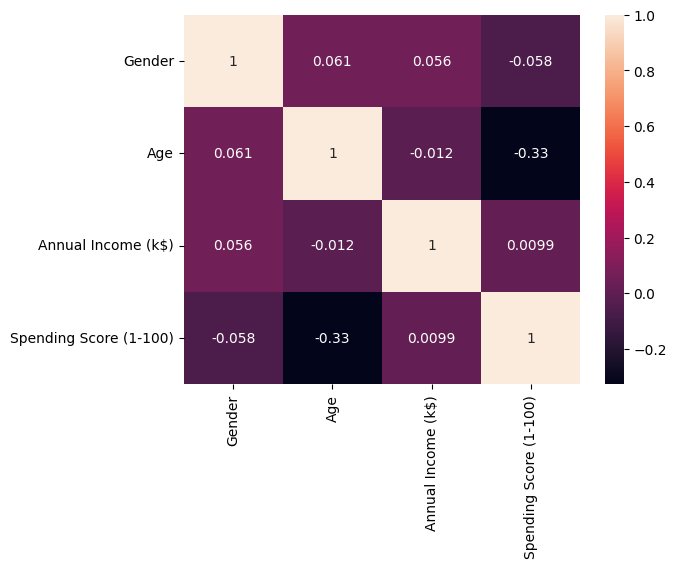

In [ ]:
corr_matrix = data.corr()
corr_matrix
sns.heatmap(corr_matrix, annot=True)

In [ ]:
model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')
clust_labels = model.fit_predict(data)

In [ ]:
agglomerative = pd.DataFrame(clust_labels)
agglomerative

,0
0,4
1,3
2,4
3,3
4,4
...,...
195,2
196,0
197,2
198,0


In [ ]:
df=pd.concat([data,agglomerative], axis=1)
df
df1 = pd.concat([df,agglomerativeT], axis=1)
df1

,Gender,Age,Annual Income (k$),Spending Score (1-100),0,0
0,1,19,15,39,4,0
1,1,21,15,81,3,3
2,0,20,16,6,4,0
3,0,23,16,77,3,3
4,0,31,17,40,4,0
...,...,...,...,...,...,...
195,0,35,120,79,2,6
196,0,45,126,28,0,5
197,1,32,126,74,2,6
198,1,32,137,18,0,5


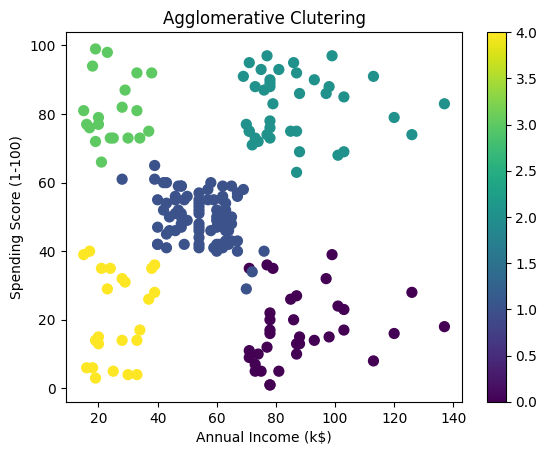

In [ ]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['Annual Income (k$)'] , data ["Spending Score (1-100)"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
plt.colorbar(scatter)

In [ ]:
modelT = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')
clust_labelsT = modelT.fit_predict(data)
agglomerativeT = pd.DataFrame(clust_labelsT)
agglomerativeT

,0
0,0
1,3
2,0
3,3
4,0
...,...
195,2
196,1
197,2
198,1


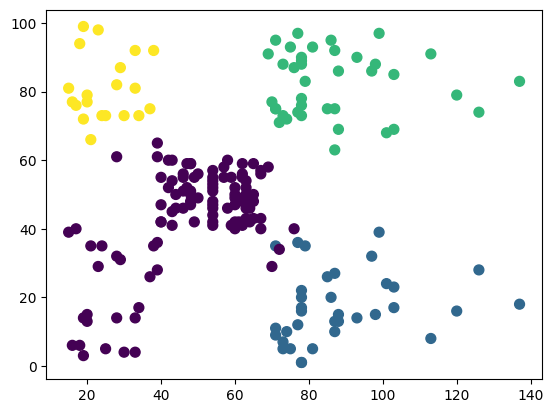

In [ ]:
figT=plt.figure()
axT = figT.add_subplot(111)
scatterT = axT.scatter (data ['Annual Income (k$)'] , data ["Spending Score (1-100)"] , c= agglomerativeT[0], s=50)

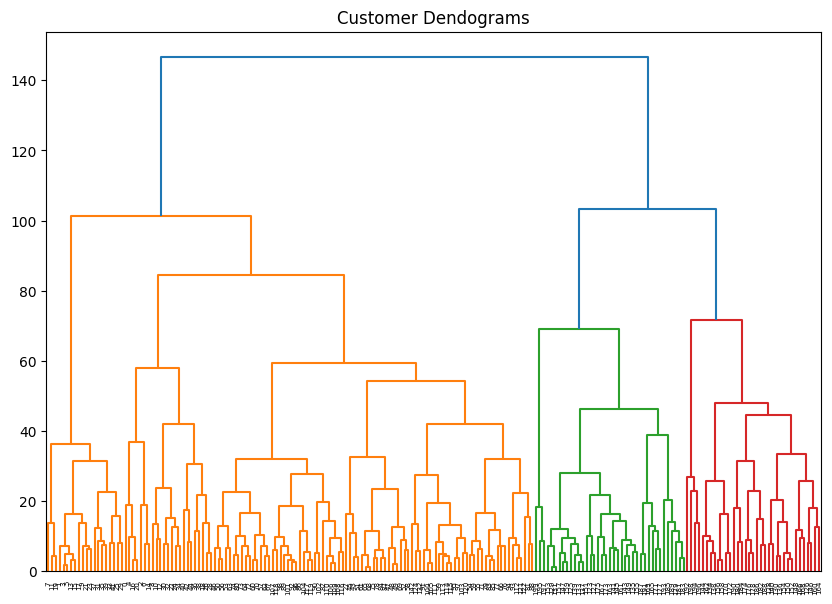

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = sch.dendrogram(sch.linkage(data, method='complete'))


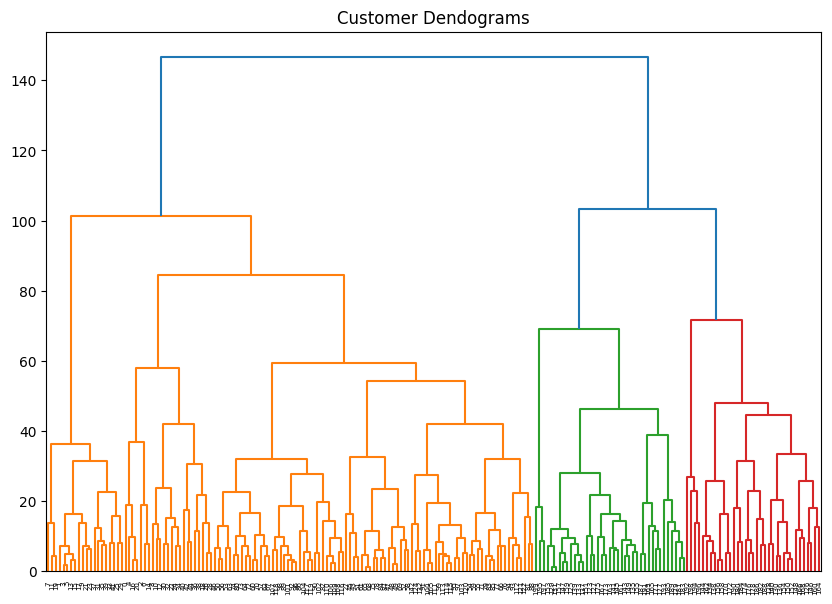

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dendT = sch.dendrogram(sch.linkage(data, method='complete'))

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

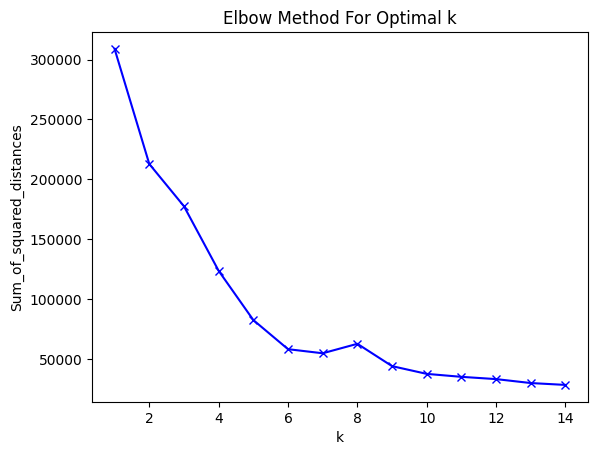

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()